# Орлогын таамаглал (Логистик регресс)
Хялбаршуулсан дэвтэр: загвар ачаалах, таамаглах, үнэлэх.

## Өгөгдөл

**Эх сурвалж:** Adult Income Dataset (Census Bureau)
https://www.kaggle.com/datasets/mastmustu/income

**Проблем:** Predict whether a person earns >$50K/year based on demographic and work-related features

**Dataset statistics:**
- **Нийт дээж:** 43957 (original 32,561-с сургалт/баталгаажуулалтын хуваарилалтаар)
- **Сургалтын багц:** 35165 дээж (80%)
- **Баталгаажуулалтын багц:** 8792 дээж (20%)

**Ангиудын тархалт:**
- **≤$50K:** ~76% (ихэнх анги - тэнцвэргүй)
- **>$50K:** ~24% (цөөн анги)

**Онцлог шинж чанарууд ( нийт 13 ):**
- **Тоон (5):** нас, боловсролын дугаар, капиталын ашиг, капиталын алдагдал, цагийн ажиллах
- **Категори (8):** ажиллах анги, боловсрол, гэрлэлтийн байдал, мэргэжил, харилцаа, арьс өнгө, хүйс, эх орон

**Зорилтот хувьсагч:** `income_>50K` (хоёртын: 0 = ≤50K, 1 = >50K)

**Сорилт:** Ангийн тэнцвэргүй байдал энэ асуудлыг илүү хэцүү болгодог - загвар 75% үнэнч байдлыг зөвхөн ≤50K-ийг үргэлж таамаглах замаар олж авах боломжтой!

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

from utils import load_model

## Өгөгдөл болон загварыг ачаалах

Дахин давтагдах боломжийг хангахын тулд урьдчилан хуваарилсан өгөгдлийг ашиглана.

In [2]:
import pandas as pd
from utils import load_model

# Keep a compact set of important features (drop many others)
keep_cols = [
    'age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week',
    'education', 'marital-status', 'occupation', 'gender'
]

# Use the same simplified features for validation
val_df = pd.read_csv('../data/val_split.csv')
X_val = val_df[keep_cols]
y_val = val_df['income_>50K']

# Build/load model trained on the same simplified features
model = load_model(keep_cols=keep_cols)
preprocessor = model.named_steps['preprocess']
logreg = model.named_steps['logreg']

X_val_processed = preprocessor.transform(X_val)
y_pred = logreg.predict(X_val_processed)

## Логистик регресс

Бидний хэрэгжилт нь градиент бууруулалт ашигладаг. Дараах график нь хCross-Entropy алдаа ба гиперпараметр сургалтын хурдны давтамжийн тоог харуулж байна

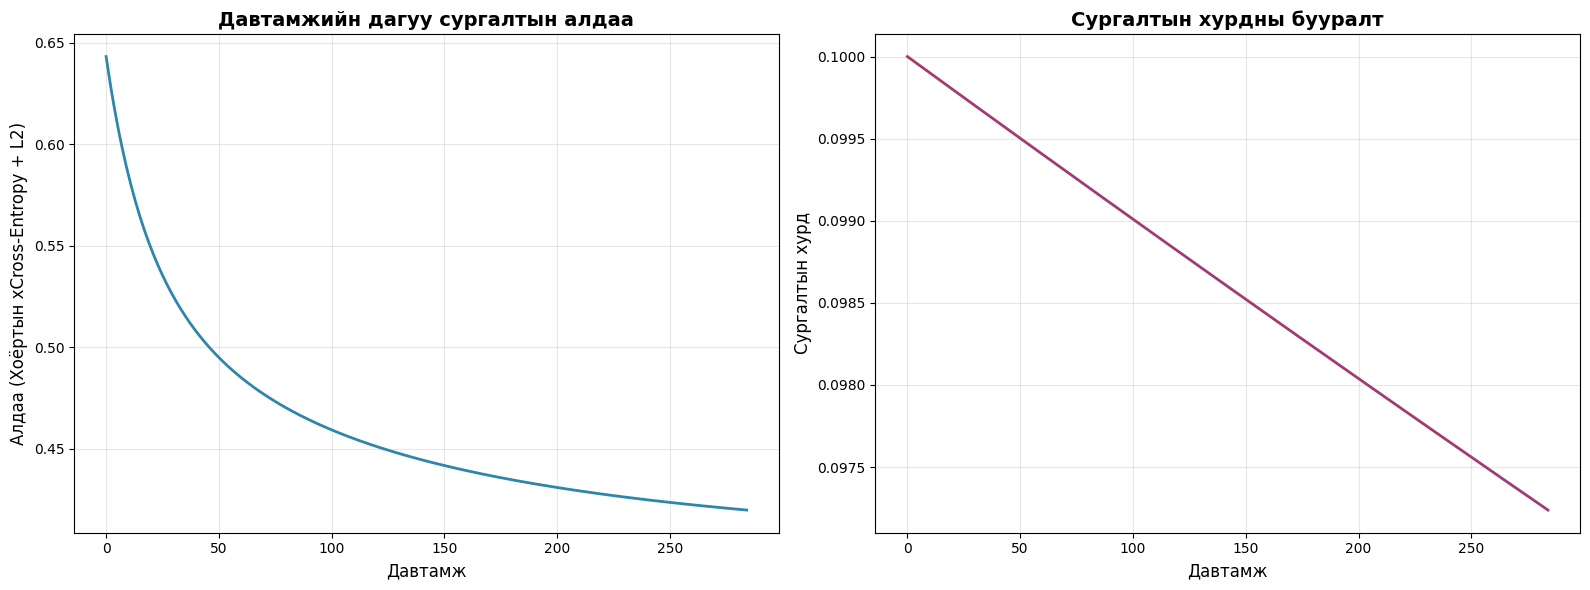

Эхний алдаа: 0.6433
Сүүлийн алдаа: 0.4199
Нийт давтамж: 285
Алдааны бууралт: 34.72%


In [3]:
# Алдааны сургалтын муруйг зур
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Алдааны муруй
ax1.plot(logreg.losses, linewidth=2, color='#2E86AB')
ax1.set_xlabel('Давтамж', fontsize=12)
ax1.set_ylabel('Алдаа (Хоёртын хCross-Entropy + L2)', fontsize=12)
ax1.set_title('Давтамжийн дагуу сургалтын алдаа', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# Сургалтын хурдны бууралт
iterations = range(len(logreg.losses))
learning_rates = [logreg.initial_lr / (1 + logreg.lr_decay * i) for i in iterations]
ax2.plot(learning_rates, linewidth=2, color='#A23B72')
ax2.set_xlabel('Давтамж', fontsize=12)
ax2.set_ylabel('Сургалтын хурд', fontsize=12)
ax2.set_title('Сургалтын хурдны бууралт', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Эхний алдаа: {logreg.losses[0]:.4f}")
print(f"Сүүлийн алдаа: {logreg.losses[-1]:.4f}")
print(f"Нийт давтамж: {len(logreg.losses)}")
print(f"Алдааны бууралт: {((logreg.losses[0] - logreg.losses[-1]) / logreg.losses[0] * 100):.2f}%")

## 3. Загварын гүйцэтгэлийн үзүүлэлтүүд

In [4]:
# Үзүүлэлтүүдийг тооцоол
metrics = {
    'Accuracy':  accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall':    recall_score(y_val, y_pred),
    'F1 score':        f1_score(y_val, y_pred)
}

# Үзүүлэлтүүдийн дата хүрээг бий болгох
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Үзүүлэлт','Оноо'])
metrics_df

,Үзүүлэлт,Оноо
0,Accuracy,0.794927
1,Precision,0.547105
2,Recall,0.830798
3,F1 score,0.659747


## 4. Будлианы матриц

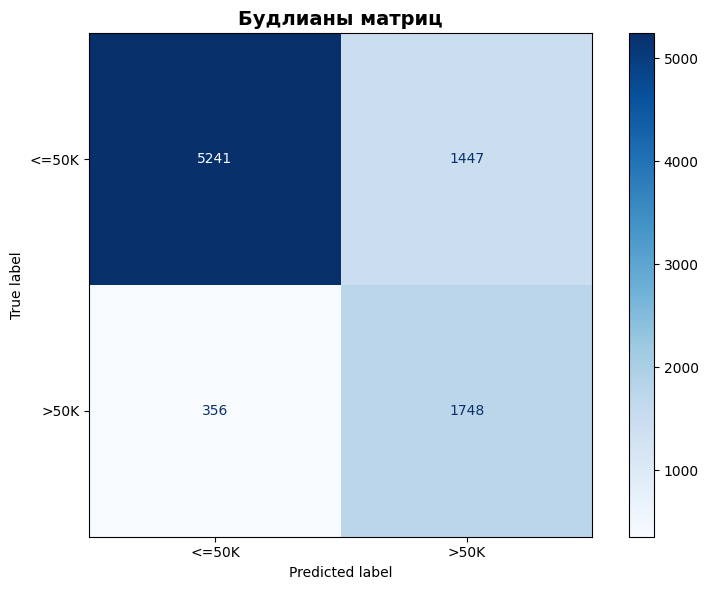

In [5]:
cm = confusion_matrix(y_val, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K','>50K'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Будлианы матриц', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Ангиллын тайлан

In [6]:
print(classification_report(y_val, y_pred, target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.94      0.78      0.85      6688
        >50K       0.55      0.83      0.66      2104

    accuracy                           0.79      8792
   macro avg       0.74      0.81      0.76      8792
weighted avg       0.84      0.79      0.81      8792



## 6. Үзүүлэлтүүд

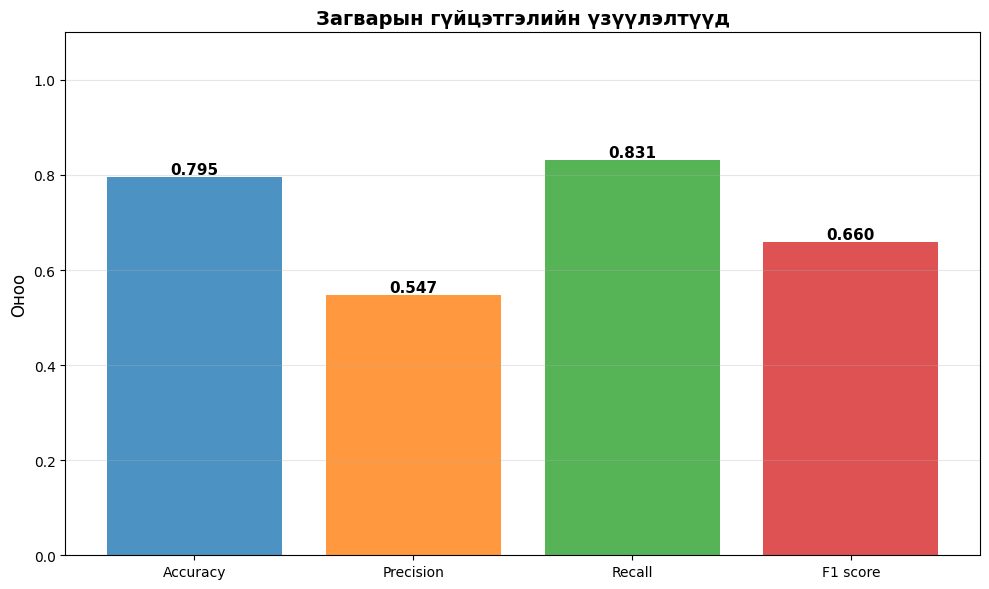

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

metric_names = list(metrics.keys())
metric_values = list(metrics.values())

bars = ax.bar(metric_names, metric_values, 
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], 
              alpha=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{height:.3f}',
           ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Оноо', fontsize=12)
ax.set_title('Загварын гүйцэтгэлийн үзүүлэлтүүд', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Онцлогийн жин
- **Ногоон баар:** Орлогын >50K магадлалыг нэмэгдүүлдэг онцлогууд
- **Улаан баар:** Орлогын >50K магадлалыг бууруулдаг онцлогууд
- Жингийн хэмжээ нь онцлогийн чухал байдлыг илэрхийлнэ

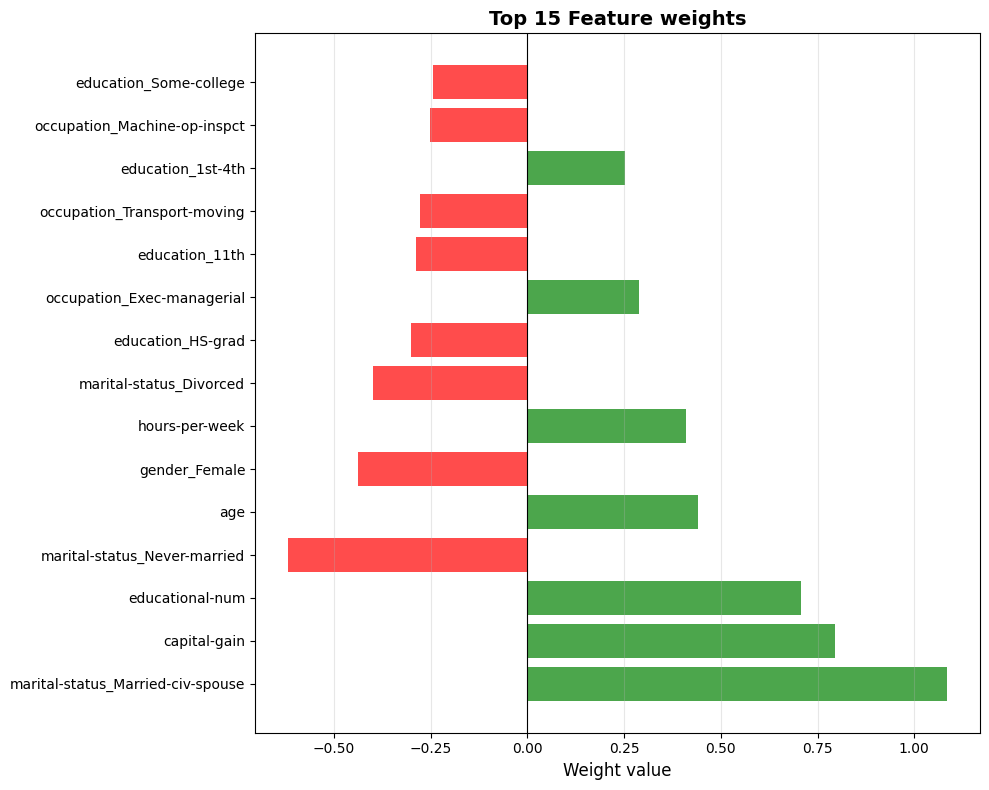

,Feature,Weight
0,marital-status_Married-civ-spouse,1.084690
1,capital-gain,0.795505
2,educational-num,0.706663
3,marital-status_Never-married,-0.618493
4,age,0.440345
5,gender_Female,-0.437376
6,hours-per-week,0.411202
7,marital-status_Divorced,-0.399949
8,education_HS-grad,-0.301864
9,occupation_Exec-managerial,0.289783


In [8]:
import numpy as np

top_n = 15

num_features = preprocessor.transformers_[0][2]
cat_cols = preprocessor.transformers_[1][2]
encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_feature_names = encoder.get_feature_names_out(cat_cols)

feature_names = list(num_features) + list(cat_feature_names)

coefs = logreg.weights.ravel()

importance_df = pd.DataFrame({'Feature': feature_names, 'Weight': coefs})
importance_df = importance_df.reindex(importance_df.Weight.abs().sort_values(ascending=False).index).reset_index(drop=True)

top_features = importance_df.head(top_n)

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['green' if x > 0 else 'red' for x in top_features['Weight']]

ax.barh(range(len(top_features)), top_features['Weight'], color=colors, alpha=0.7)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'])
ax.set_xlabel('Weight value', fontsize=12)
ax.set_title(f'Top {top_n} Feature weights', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()
display(top_features)

## 8. Сигмоид функц

Сигмоид функц σ(z) = 1/(1 + e^(-z)) шугаман таамаглалуудаас магадлал руу хөрвүүлдэг.
Математикийн функц болон манай загварын таамаглалууд хэрхэн тархсан байдлыг визуализацийн хамт үзүүлье.

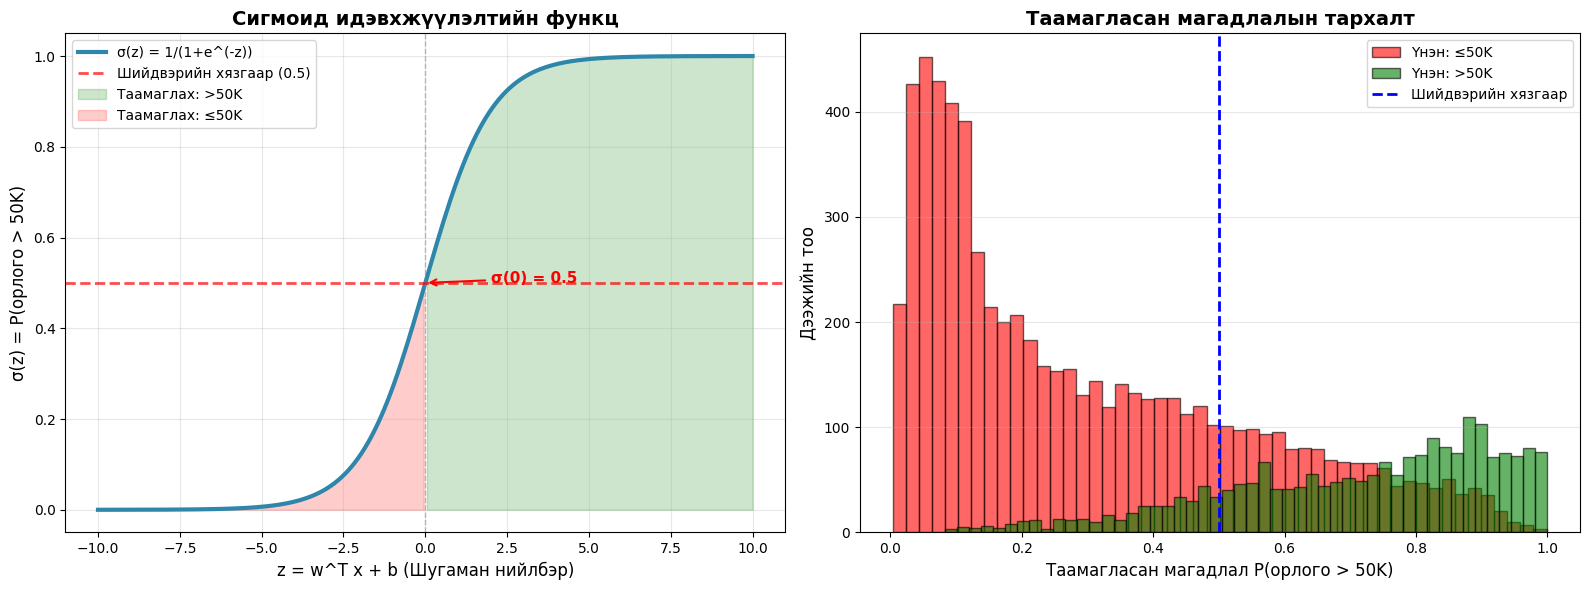


Үнэн ≤50K дээжүүдийн хувьд:
  Дундаж магадлал: 0.2946
  Дундаж бус магадлал: 0.2160
  Стандарт отклонение: 0.2428

Үнэн >50K дээжүүдийн хувьд:
  Дундаж магадлал: 0.7129
  Дундаж бус магадлал: 0.7583
  Стандарт отклонение: 0.2062


In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

z_range = np.linspace(-10, 10, 200)
sigmoid_values = logreg.sigmoid(z_range)

ax1.plot(z_range, sigmoid_values, linewidth=3, color='#2E86AB', label='σ(z) = 1/(1+e^(-z))')
ax1.axhline(y=0.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Шийдвэрийн хязгаар (0.5)')
ax1.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.fill_between(z_range, 0, sigmoid_values, where=(sigmoid_values >= 0.5), 
                  alpha=0.2, color='green', label='Таамаглах: >50K')
ax1.fill_between(z_range, 0, sigmoid_values, where=(sigmoid_values < 0.5), 
                  alpha=0.2, color='red', label='Таамаглах: ≤50K')

ax1.set_xlabel('z = w^T x + b (Шугаман нийлбэр)', fontsize=12)
ax1.set_ylabel('σ(z) = P(орлого > 50K)', fontsize=12)
ax1.set_title('Сигмоид идэвхжүүлэлтийн функц', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)
ax1.set_ylim([-0.05, 1.05])

ax1.annotate('σ(0) = 0.5', xy=(0, 0.5), xytext=(2, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, color='red', fontweight='bold')

y_proba = logreg.predict_proba(X_val_processed)[:, 1]

proba_class0 = y_proba[y_val == 0]
proba_class1 = y_proba[y_val == 1]

ax2.hist(proba_class0, bins=50, alpha=0.6, color='red', label='Үнэн: ≤50K', edgecolor='black')
ax2.hist(proba_class1, bins=50, alpha=0.6, color='green', label='Үнэн: >50K', edgecolor='black')
ax2.axvline(x=0.5, color='blue', linestyle='--', linewidth=2, label='Шийдвэрийн хязгаар')

ax2.set_xlabel('Таамагласан магадлал P(орлого > 50K)', fontsize=12)
ax2.set_ylabel('Дээжийн тоо', fontsize=12)
ax2.set_title('Таамагласан магадлалын тархалт', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nҮнэн ≤50K дээжүүдийн хувьд:")
print(f"  Дундаж магадлал: {proba_class0.mean():.4f}")
print(f"  Дундаж бус магадлал: {np.median(proba_class0):.4f}")
print(f"  Стандарт отклонение: {proba_class0.std():.4f}")

print(f"\nҮнэн >50K дээжүүдийн хувьд:")
print(f"  Дундаж магадлал: {proba_class1.mean():.4f}")
print(f"  Дундаж бус магадлал: {np.median(proba_class1):.4f}")
print(f"  Стандарт отклонение: {proba_class1.std():.4f}")

## 10. Хязгаарын оптимизаци

0.5-ийн үндсэн хязгаар нь тэнцвэргүй өгөгдлийн багцад хамгийн сайн биш байж магадгүй.
F1 оноог хамгийн их байлгахын тулд хамгийн сайн хязгаарыг олоорой.

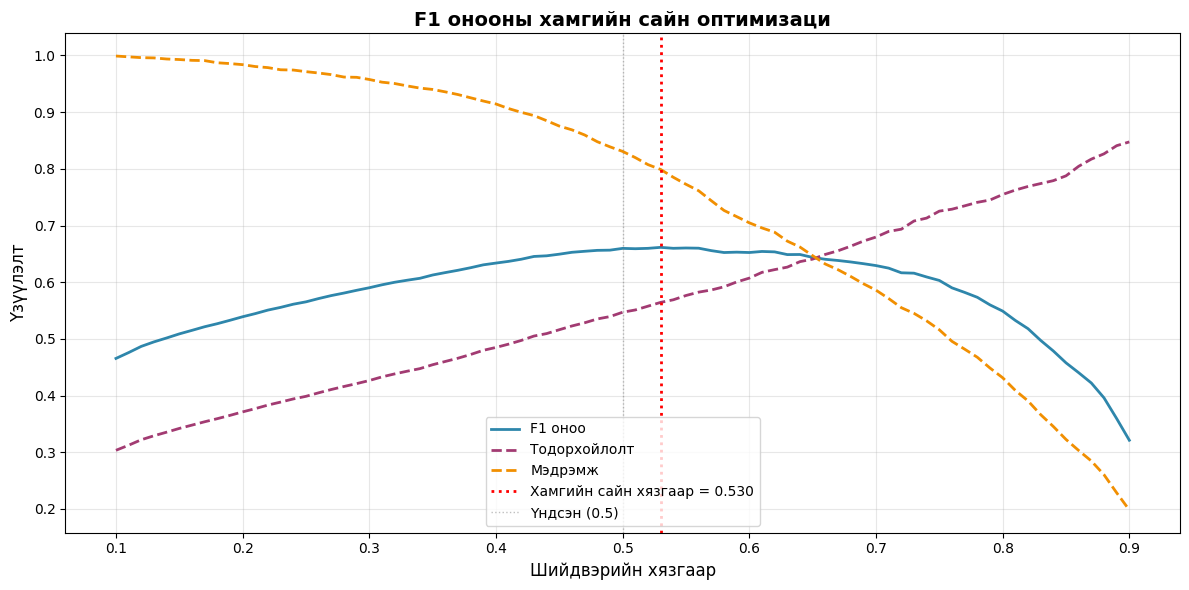


Хамгийн сайн хязгаар: 0.530
Хамгийн их F1 оноо: 0.6616
  Тодорхойлолт: 0.5645
  Мэдрэмж:    0.7990


In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Өөр өөр хязгаарыг туршиж үзэх
thresholds = np.linspace(0.1, 0.9, 81)
y_proba = logreg.predict_proba(X_val_processed)[:, 1]

f1_scores = []
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_val, y_pred_thresh))
    precision_scores.append(precision_score(y_val, y_pred_thresh))
    recall_scores.append(recall_score(y_val, y_pred_thresh))

# Шийдвэрлэх хамгийн сайн хязгаарыг олох
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Зурах
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(thresholds, f1_scores, linewidth=2, label='F1 оноо', color='#2E86AB')
ax.plot(thresholds, precision_scores, linewidth=2, label='Тодорхойлолт', color='#A23B72', linestyle='--')
ax.plot(thresholds, recall_scores, linewidth=2, label='Мэдрэмж', color='#F18F01', linestyle='--')

ax.axvline(x=optimal_threshold, color='red', linestyle=':', linewidth=2, 
           label=f'Хамгийн сайн хязгаар = {optimal_threshold:.3f}')
ax.axvline(x=0.5, color='gray', linestyle=':', linewidth=1, alpha=0.5, label='Үндсэн (0.5)')

ax.set_xlabel('Шийдвэрийн хязгаар', fontsize=12)
ax.set_ylabel('Үзүүлэлт', fontsize=12)
ax.set_title('F1 онооны хамгийн сайн оптимизаци', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nХамгийн сайн хязгаар: {optimal_threshold:.3f}")
print(f"Хамгийн их F1 оноо: {f1_scores[optimal_idx]:.4f}")
print(f"  Тодорхойлолт: {precision_scores[optimal_idx]:.4f}")
print(f"  Мэдрэмж:    {recall_scores[optimal_idx]:.4f}")

## 11. Яагаад бид төгс үзүүлэлтүүдийг авч чадахгүй вэ

Тодорхой нэгэн зүйлсийн хоорондох **нарийвчлал-мэдрэмжийн худалдаа**:
- **Өндөр нарийвчлал** = Бага хуурамч эерэг → Бид болгоомжтой байна → Зарим үнэн эерэгийг алдаж байна (доод мэдрэмж)
- **Өндөр мэдрэмж** = Бүх үнэн эерэгийг барьж авах → Бид идэвхтэй байна → Олон хуурамч эерэг авна (доод нарийвчлал)

**Та 100% -ийг хоёуланг нь авах боломжгүй** хэрэв таны ангиуд төгс тусгаарлагдсан бол (жирийн бодит өгөгдөл хэзээ ч биш).

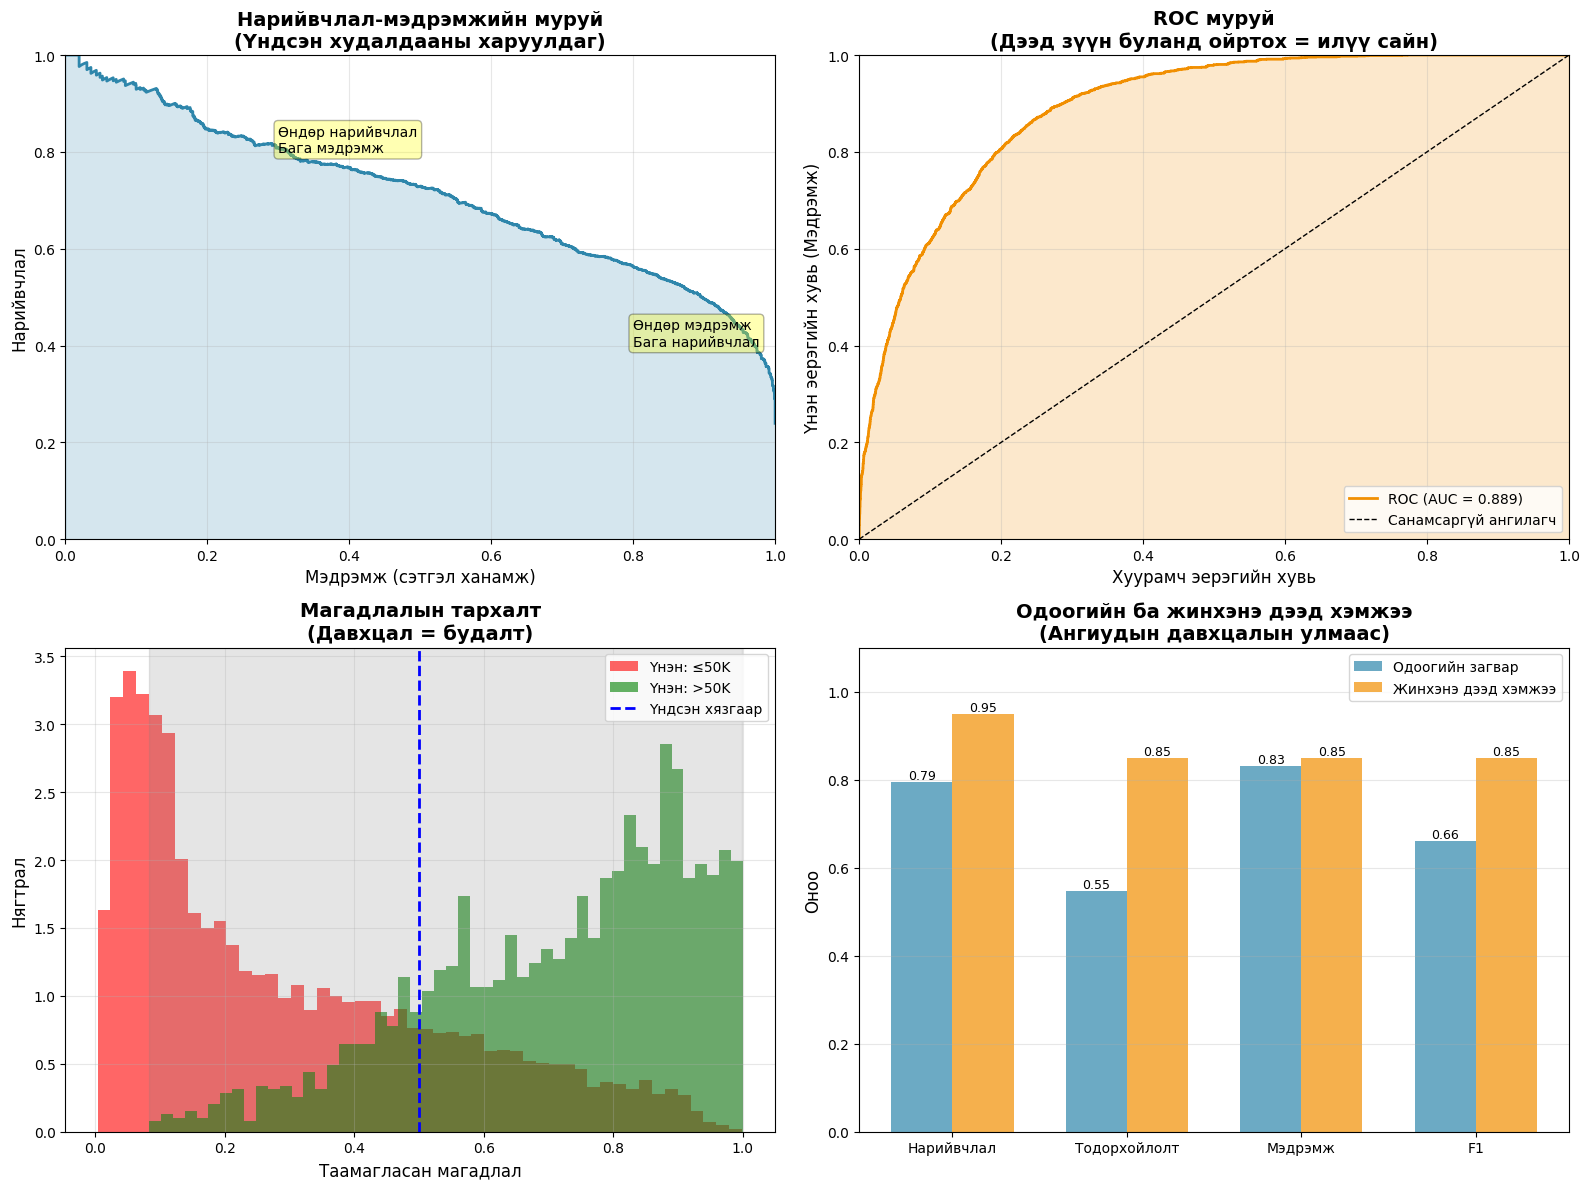

In [11]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_proba = logreg.predict_proba(X_val_processed)[:, 1]

precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_val, y_proba)

fpr, tpr, roc_thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

ax1.plot(recall_curve, precision_curve, linewidth=2, color='#2E86AB')
ax1.fill_between(recall_curve, precision_curve, alpha=0.2, color='#2E86AB')
ax1.set_xlabel('Мэдрэмж (сэтгэл ханамж)', fontsize=12)
ax1.set_ylabel('Нарийвчлал', fontsize=12)
ax1.set_title('Нарийвчлал-мэдрэмжийн муруй\n(Үндсэн худалдааны харуулдаг)', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])

ax1.annotate('Өндөр нарийвчлал\nБага мэдрэмж', xy=(0.3, 0.8), fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax1.annotate('Өндөр мэдрэмж\nБага нарийвчлал', xy=(0.8, 0.4), fontsize=10,
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

ax2.plot(fpr, tpr, linewidth=2, color='#F18F01', label=f'ROC (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Санамсаргүй ангилагч')
ax2.fill_between(fpr, tpr, alpha=0.2, color='#F18F01')
ax2.set_xlabel('Хуурамч эерэгийн хувь', fontsize=12)
ax2.set_ylabel('Үнэн эерэгийн хувь (Мэдрэмж)', fontsize=12)
ax2.set_title('ROC муруй\n(Дээд зүүн буланд ойртох = илүү сайн)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])

proba_class0 = y_proba[y_val == 0]
proba_class1 = y_proba[y_val == 1]

ax3.hist(proba_class0, bins=50, alpha=0.6, color='red', label='Үнэн: ≤50K', density=True)
ax3.hist(proba_class1, bins=50, alpha=0.6, color='green', label='Үнэн: >50K', density=True)
ax3.axvline(x=0.5, color='blue', linestyle='--', linewidth=2, label='Үндсэн хязгаар')
ax3.set_xlabel('Таамагласан магадлал', fontsize=12)
ax3.set_ylabel('Нягтрал', fontsize=12)
ax3.set_title('Магадлалын тархалт\n(Давхцал = будалт)', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)

overlap_min = max(proba_class0.min(), proba_class1.min())
overlap_max = min(proba_class0.max(), proba_class1.max())
ax3.axvspan(overlap_min, overlap_max, alpha=0.2, color='gray', label='Давхцал бүс')

metrics_analysis = pd.DataFrame({
    'Үзүүлэлт': ['Нарийвчлал', 'Тодорхойлолт', 'Мэдрэмж', 'F1'],
    'Одоогийн': [
        accuracy_score(y_val, y_pred),
        precision_score(y_val, y_pred),
        recall_score(y_val, y_pred),
        f1_score(y_val, y_pred)
    ],
    'Онолын Макс': [0.95, 0.85, 0.85, 0.85]  # Жинхэнэ таамаглал
})

x = np.arange(len(metrics_analysis))
width = 0.35

bars1 = ax4.bar(x - width/2, metrics_analysis['Одоогийн'], width, 
                label='Одоогийн загвар', color='#2E86AB', alpha=0.7)
bars2 = ax4.bar(x + width/2, metrics_analysis['Онолын Макс'], width,
                label='Жинхэнэ дээд хэмжээ', color='#F18F01', alpha=0.7)

ax4.set_ylabel('Оноо', fontsize=12)
ax4.set_title('Одоогийн ба жинхэнэ дээд хэмжээ\n(Ангиудын давхцалын улмаас)', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(metrics_analysis['Үзүүлэлт'])
ax4.legend(fontsize=10)
ax4.set_ylim([0, 1.1])
ax4.grid(alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

overlap_percentage = len(y_proba[(y_proba >= overlap_min) & (y_proba <= overlap_max)]) / len(y_proba) * 100

Дээрх эсийн агуулга нь хоёртын ангилалд үндсэн худалдааны харуулж байна.

PRC нь та нарийвчлал, мэдрэмж хоёрыг зэрэгцүүлэн дээд зэргээр нэмэгдүүлэх боломжгүйг харуулж байна, ROC муруй нь нийтлэг ялгах чадварыг хэмждэг (илүү өндөр = илүү сайн)
Магадлалын давхцал нь зарим дээжийг зөв ангилах боломжгүй байдлыг харуулж байна. Одоогийн ба онолын дээд хэмжээ нь бодит гүйцэтгэлийн хүлээлтүүдийг харуулж байна.